# RENTAL PRICE PREDICTION

In [55]:
! pip install openpyxl

In [56]:
import pandas as pd
import openpyxl

In [57]:
df_pricing = pd.read_csv('https://full-stack-assets.s3.eu-west-3.amazonaws.com/Deployment/get_around_pricing_project.csv')
df_pricing.drop(columns='Unnamed: 0', inplace=True, axis=1)
df_pricing

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
0,Citroën,140411,100,diesel,black,convertible,True,True,False,False,True,True,True,106
1,Citroën,13929,317,petrol,grey,convertible,True,True,False,False,False,True,True,264
2,Citroën,183297,120,diesel,white,convertible,False,False,False,False,True,False,True,101
3,Citroën,128035,135,diesel,red,convertible,True,True,False,False,True,True,True,158
4,Citroën,97097,160,diesel,silver,convertible,True,True,False,False,False,True,True,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4838,Toyota,39743,110,diesel,black,van,False,True,False,False,False,False,True,121
4839,Toyota,49832,100,diesel,grey,van,False,True,False,False,False,False,True,132
4840,Toyota,19633,110,diesel,grey,van,False,True,False,False,False,False,True,130
4841,Toyota,27920,110,diesel,brown,van,True,True,False,False,False,False,True,151


## EDA of pricing dataset

In [58]:
df_pricing.describe(include='all')

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
count,4843,4.843000e+03,4843.00000,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843,4843.000000
unique,28,NaN,NaN,4,10,8,2,2,2,2,2,2,2,NaN
top,Citroën,NaN,NaN,diesel,black,estate,True,True,False,False,False,False,True,NaN
freq,969,NaN,NaN,4641,1633,1606,2662,3839,3865,3881,2613,3674,4514,NaN
mean,NaN,1.409628e+05,128.98823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,121.214536
std,NaN,6.019674e+04,38.99336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.568268
min,NaN,-6.400000e+01,0.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000
25%,NaN,1.029135e+05,100.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,104.000000
50%,NaN,1.410800e+05,120.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.000000
75%,NaN,1.751955e+05,135.00000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.000000


### Models

In [59]:
df_pricing.model_key.value_counts(dropna=False).sort_index()

Alfa Romeo       3
Audi           526
BMW            827
Citroën        969
Ferrari         33
Fiat             2
Ford             5
Honda            1
KIA Motors       3
Lamborghini      2
Lexus            2
Maserati        18
Mazda            1
Mercedes        97
Mini             1
Mitsubishi     231
Nissan         275
Opel            33
PGO             33
Peugeot        642
Porsche          6
Renault        916
SEAT            46
Subaru          44
Suzuki           8
Toyota          53
Volkswagen      65
Yamaha           1
Name: model_key, dtype: int64

### Model data is ok.

### Mileage check

In [60]:
(df_pricing.mileage > 0).value_counts()

True     4842
False       1
Name: mileage, dtype: int64

### There is one rental with a car's mileage that is negative or zero. We remove it. 

In [61]:
print("Row count before filtering :", df_pricing.shape[0])
df_pricing = df_pricing[df_pricing.mileage > 0]
print("Row count after filtering :", df_pricing.shape[0])

Row count before filtering : 4843
Row count after filtering : 4842


### Checking mileage outliers

<AxesSubplot: >

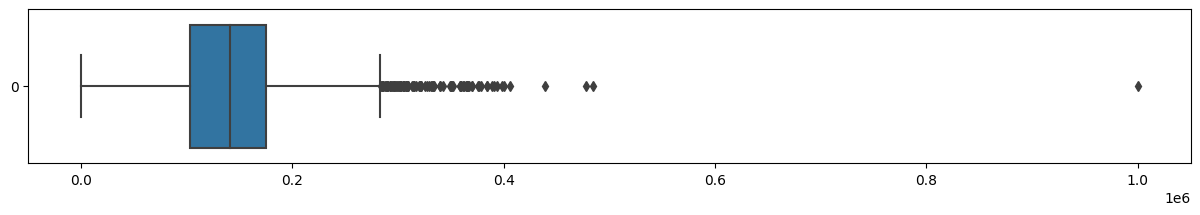

In [62]:
from matplotlib import pyplot
import seaborn as sns
fig, ax = pyplot.subplots(figsize=(15,2))
sns.boxplot(ax=ax, data=df_pricing.mileage, orient="h")

### There is some extreme value. We are going to determine it and remove the corresponding rentals.

In [63]:
df_pricing[df_pricing.mileage > 0.8*1e6]

,model_key,mileage,engine_power,fuel,paint_color,car_type,private_parking_available,has_gps,has_air_conditioning,automatic_car,has_getaround_connect,has_speed_regulator,winter_tires,rental_price_per_day
3732,Citroën,1000376,90,diesel,black,subcompact,True,False,False,False,False,False,True,37


In [64]:
print("Row count before filtering :", df_pricing.shape[0])
df_pricing = df_pricing[df_pricing.mileage <= 0.8*1e6]
print("Row count after filtering :", df_pricing.shape[0])

Row count before filtering : 4842
Row count after filtering : 4841


### Engine power check

In [65]:
(df_pricing.engine_power > 0).value_counts()

True     4840
False       1
Name: engine_power, dtype: int64

### There is one rental with a car's engine power that is negative or 0. We remove it. 

In [66]:
print("Row count before filtering :", df_pricing.shape[0])
df_pricing = df_pricing[df_pricing.engine_power > 0]
print("Row count after filtering :", df_pricing.shape[0])

Row count before filtering : 4841
Row count after filtering : 4840


<AxesSubplot: >

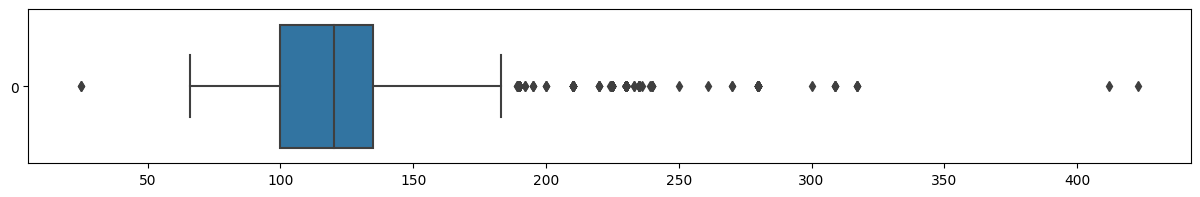

In [67]:
from matplotlib import pyplot
import seaborn as sns
fig, ax = pyplot.subplots(figsize=(15,2))
sns.boxplot(ax=ax, data=df_pricing.engine_power, orient="h")

### There are some cars with engine power too low (<50) and too high (>400). We are going to remove it.

In [68]:
print("Row count before filtering :", df_pricing.shape[0])
df_pricing = df_pricing[(df_pricing.engine_power > 50) & (df_pricing.engine_power < 400)]
print("Row count after filtering :", df_pricing.shape[0])

Row count before filtering : 4840
Row count after filtering : 4836


### Fuel type study

In [69]:
df_pricing.fuel.value_counts(dropna=False)

diesel           4638
petrol            189
hybrid_petrol       6
electro             3
Name: fuel, dtype: int64

### There are some rare values but we chose to keep it as it is real values.

### Paint color study

In [70]:
df_pricing.paint_color.value_counts(dropna=False)

black     1629
grey      1175
blue       710
white      536
brown      341
silver     329
red         51
beige       41
green       18
orange       6
Name: paint_color, dtype: int64

### Nothing to remove or change for car paint color

### Car type study

In [71]:
df_pricing.car_type.value_counts(dropna=False)

estate         1606
sedan          1166
suv            1056
hatchback       697
subcompact      116
coupe           104
convertible      47
van              44
Name: car_type, dtype: int64

### Nothing to remove or change for car type

### private_parking_available, has_gps, has_air_conditioning, automatic_car, has_getaround_connect, has_speed_regulator, winter_tires study

In [72]:
for field in ['private_parking_available', 'has_gps', 'has_air_conditioning', 'automatic_car', 'has_getaround_connect', 'has_speed_regulator', 'winter_tires']:
    print(field, '\n', df_pricing[field].value_counts(dropna=False), '\n')

private_parking_available 
 True     2658
False    2178
Name: private_parking_available, dtype: int64 

has_gps 
 True     3834
False    1002
Name: has_gps, dtype: int64 

has_air_conditioning 
 False    3860
True      976
Name: has_air_conditioning, dtype: int64 

automatic_car 
 False    3875
True      961
Name: automatic_car, dtype: int64 

has_getaround_connect 
 False    2607
True     2229
Name: has_getaround_connect, dtype: int64 

has_speed_regulator 
 False    3668
True     1168
Name: has_speed_regulator, dtype: int64 

winter_tires 
 True     4508
False     328
Name: winter_tires, dtype: int64 



### Nothing to remove or change for all these fields

## At first glance, the rental_price_per_day data seems to be ok. Let's see the outliers.

<AxesSubplot: >

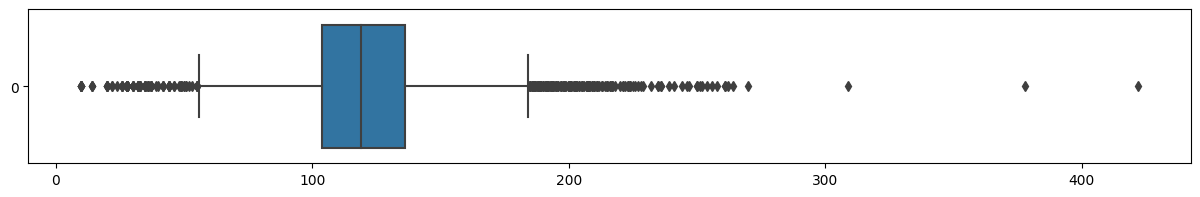

In [73]:
from matplotlib import pyplot
import seaborn as sns
fig, ax = pyplot.subplots(figsize=(15,2))
sns.boxplot(ax=ax, data=df_pricing.rental_price_per_day, orient="h")

## We can decide to remove the rentals highers than 300.

In [74]:
print("Row count before filtering :", df_pricing.shape[0])
df_pricing = df_pricing[df_pricing.rental_price_per_day < 300]
print("Row count after filtering :", df_pricing.shape[0])

Row count before filtering : 4836
Row count after filtering : 4833


# The dataset is cleaned up. Let's try to predict the pricing following all others features !

## Let's check correlations between some of the features

C:\Users\ylequ\AppData\Local\Temp\ipykernel_2252\1073128343.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



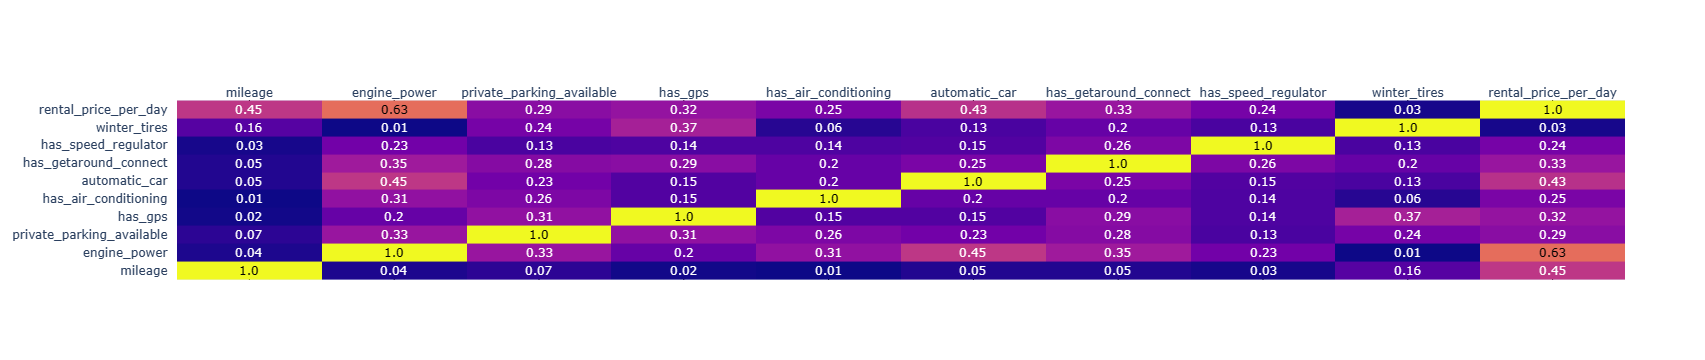

In [98]:
corr_matrix = df_pricing.corr().abs().round(2)
import plotly.figure_factory as ff
fig = ff.create_annotated_heatmap(corr_matrix.values,
                                  x = corr_matrix.columns.tolist(),
                                  y = corr_matrix.index.tolist())
fig.show()

### We can see that engine power is rather correlated with rental price whereas winter tires is not.
### The automatic data and mileage are important too !

## BASELINE MODEL - LINEAR REGRESSION

In [134]:
from sklearn.model_selection import train_test_split
target = "rental_price_per_day"
X = df_pricing.drop(target, axis=1)
Y = df_pricing[target]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

### Standardization

In [135]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

numeric_features = ['mileage', 'engine_power']
categorical_features = ['model_key', 'fuel', 'paint_color',
       'car_type', 'private_parking_available', 'has_gps',
       'has_air_conditioning', 'automatic_car', 'has_getaround_connect',
       'has_speed_regulator', 'winter_tires']

numeric_transformer = Pipeline(steps=[('scaler', MinMaxScaler())
])

categorical_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

preprocessor.fit(X) # In order to get all the fields (even the one with few values on paint color or model)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', MinMaxScaler())]),
                                 ['mileage', 'engine_power']),
                                ('cat', OneHotEncoder(drop='first'),
                                 ['model_key', 'fuel', 'paint_color',
                                  'car_type', 'private_parking_available',
                                  'has_gps', 'has_air_conditioning',
                                  'automatic_car', 'has_getaround_connect',
                                  'has_speed_regulator', 'winter_tires'])])

In [136]:
print("Preprocessing X_train & X_test...")
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)
print('...Done.')

Preprocessing X_train & X_test...
...Done.


### Training model with simple linear regression to get a baseline

In [137]:
from sklearn.linear_model import LinearRegression

print("Train model with linear regression ...")
regressor = LinearRegression()
regressor.fit(X_train, Y_train)
print("...Done.")

Train model with linear regression ...
...Done.


In [138]:
# Predictions on training set
print("Predictions on training set...")
Y_train_pred = regressor.predict(X_train)
print("...Done.")
print(Y_train_pred)

Predictions on training set...
...Done.
[ 98.75993911 106.64520897  99.09262467 ... 125.09572575 119.83903898
 156.65573083]


In [139]:
# Predictions on test set
print("Predictions on test set...")
Y_test_pred = regressor.predict(X_test)
print("...Done.")
print(Y_test_pred[0:5])

Predictions on test set...
...Done.
[117.88954281 125.62348808 141.95306662 100.67251462 117.54003292]


In [140]:
from sklearn.metrics import r2_score
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.7313816141581879
R2 score on test set :  0.7182170653196109


### Results are not so bad. Let's check the most important features !

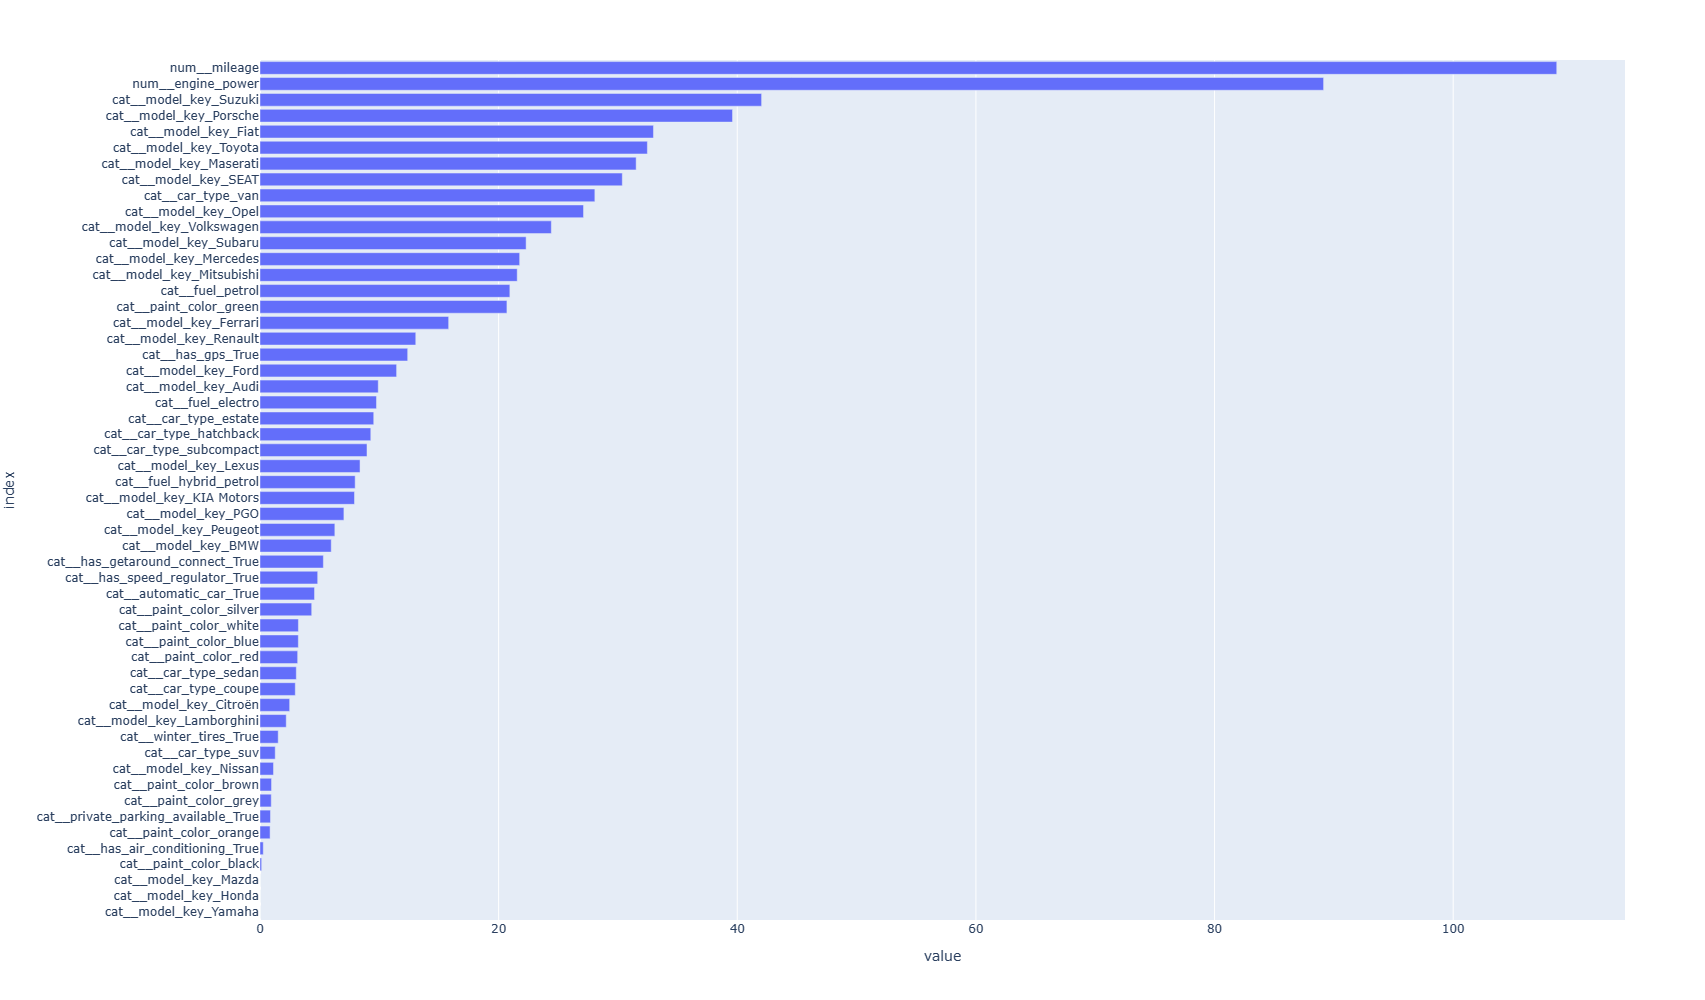

In [126]:
import plotly.express as px
coefs = pd.DataFrame(index = preprocessor.get_feature_names_out(), data = regressor.coef_.transpose(), columns=["coefficients"])
feature_importance = abs(coefs).sort_values(by = 'coefficients')
feature_importance
fig = px.bar(feature_importance, orientation = 'h')
fig.update_layout(showlegend = False, margin = {'l': 200}, width=1000, height=1000)
fig.show()

## Let's try with a Random forest regressor model !

In [141]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
regressor.fit(X_train, Y_train)
Y_train_pred = regressor.predict(X_train)
Y_test_pred = regressor.predict(X_test)
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.9688353272204655
R2 score on test set :  0.7626029556738074


### Results are good but it overfits too much !

### Let's try to fight overfitting with cross validation.

In [143]:
regressor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [147]:
from sklearn.model_selection import GridSearchCV
# Grid of values to be tested
params = {
    'n_jobs':[-1],
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [2, 4, 8],
    'n_estimators': [10, 20, 40, 60, 80, 100]
}
gridsearch = GridSearchCV(regressor, param_grid = params, cv = 3) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)

...Done.
Best hyperparameters :  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 80, 'n_jobs': -1}
Best validation accuracy :  0.747548095980581


In [148]:
Y_train_pred = gridsearch.predict(X_train)
Y_test_pred = gridsearch.predict(X_test)
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.8897074559003001
R2 score on test set :  0.7527465123473241


### We did not improve the testing score but there is less overfitting ! 

## Let's try with XGBoost regressor !

In [149]:
from xgboost import XGBRegressor
regressor = XGBRegressor(n_jobs=-1) 
regressor.fit(X_train, Y_train)
Y_train_pred = regressor.predict(X_train)
Y_test_pred = regressor.predict(X_test)
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.9504629565506363
R2 score on test set :  0.7825567595787086


### Score is better but there is still overfitting. Let's try to fight it !

In [150]:
regressor.get_params()

{'objective': 'reg:squarederror',
 'base_score': 0.5,
 'booster': 'gbtree',
 'callbacks': None,
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': 0,
 'gpu_id': -1,
 'grow_policy': 'depthwise',
 'importance_type': None,
 'interaction_constraints': '',
 'learning_rate': 0.300000012,
 'max_bin': 256,
 'max_cat_threshold': 64,
 'max_cat_to_onehot': 4,
 'max_delta_step': 0,
 'max_depth': 6,
 'max_leaves': 0,
 'min_child_weight': 1,
 'missing': nan,
 'monotone_constraints': '()',
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': 1,
 'predictor': 'auto',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'sampling_method': 'uniform',
 'scale_pos_weight': 1,
 'subsample': 1,
 'tree_method': 'exact',
 'validate_parameters': 1,
 'verbosity': None}

In [152]:
params = {
    'n_jobs':[-1],
    'max_depth': [2, 4, 6, 8, 10],
    'min_child_weight': [0, 1, 2, 5],
    'gamma': [0, 1, 2, 5],
    'n_estimators': [10, 20, 40, 60, 80, 100, 120, 140, 160]
}
gridsearch = GridSearchCV(regressor, param_grid = params, cv = 3) # cv : the number of folds to be used for CV
gridsearch.fit(X_train, Y_train)
print("...Done.")
print("Best hyperparameters : ", gridsearch.best_params_)
print("Best validation accuracy : ", gridsearch.best_score_)

...Done.
Best hyperparameters :  {'gamma': 5, 'max_depth': 6, 'min_child_weight': 5, 'n_estimators': 40, 'n_jobs': -1}
Best validation accuracy :  0.7659184232119888


In [153]:
Y_train_pred = gridsearch.predict(X_train)
Y_test_pred = gridsearch.predict(X_test)
print("R2 score on training set : ", r2_score(Y_train, Y_train_pred))
print("R2 score on test set : ", r2_score(Y_test, Y_test_pred))

R2 score on training set :  0.8796766680103631
R2 score on test set :  0.7765098454330447


### Test score is almost the same but there is less overfitting.

In [157]:
gridsearch.best_params_

{'gamma': 5,
 'max_depth': 6,
 'min_child_weight': 5,
 'n_estimators': 40,
 'n_jobs': -1}

# Saving model and preprocessor to be used by web app predictor api

In [162]:
from pickle import dump
dump(preprocessor, open('./Webapp_api/preprocessor.dmp', 'wb'))
dump(gridsearch.best_estimator_, open('./Webapp_api/regressor.dmp', 'wb'))